# CAPSTONE PROJECT - Greenhouse Gas Cost by Location of Restaurants with Beef Items on Menu

IMPORT APPLICABLE LIBRARIES 

In [296]:
import requests # library to handle requests
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
import json # library to handle JSON files

import requests # library to handle requests
import urllib.request

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

#import to utilizeregular expression
import re

from bs4 import BeautifulSoup #for parsing menus

Folium installed
Libraries imported.


IDENTIFY RELEVANT CONVERSION FACTS 

SOURCE FOR Mile Equivalent per Half Pound of Meat: https://www.scientificamerican.com/slideshow/the-greenhouse-hamburger/

In [480]:
MiEquivPerHalfLb = 9.81 
MiEquivPerOz = 9.81/8  #1 lb = 16 oz, .5 = 8 oz
OzConversion = 0.03527396
#CONVERSION : OzWgt = 0.03527396*GmWgt


REVIEW FOURSQUARE DATA - Utilize Foursquare API to identify restaurants in Quincy, MA and obtain location and other information.  Familiarity with area allows for verification of FourSquare data.

Get geographical coordinates of Quincy.

In [481]:
address = 'Quincy Center, MA'

geolocator = Nominatim(user_agent="QC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Quincy Center are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Quincy Center are 42.2519231, -71.0056552.


Utilize Foursquare API.

In [482]:
CLIENT_ID = 'PAQS0AI5F44NVQGAIHIX1RQM2XKP1LN5XZCXYBVAB1AUEWRW' # your Foursquare ID
CLIENT_SECRET = '4S3YOGSHIXJHZOIAT3LB25SERBR4L0F3G0AKO0UZ4PZBFMHR'
ACCESS_TOKEN = 'NA5C4T0PNS4MQKSSAUGPSTXHO5AZ0YOQJNQKJMAG0RGR3G32'
VERSION = '20180604'
LIMIT = 100
print('Your credentials:')
print('CLIENT_ID',":" + CLIENT_ID)
print('CLIENT SECRET',":" + CLIENT_SECRET)

Your credentials:
CLIENT_ID :PAQS0AI5F44NVQGAIHIX1RQM2XKP1LN5XZCXYBVAB1AUEWRW
CLIENT SECRET :4S3YOGSHIXJHZOIAT3LB25SERBR4L0F3G0AKO0UZ4PZBFMHR


In [483]:
#NOTE = QUERY = food (to search restaurant venues)

radius = 2000 

# create URL (specify "...venues/explore...")
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=food'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

#create GET request
results = requests.get(url).json()

#Clean json and structure into pandas dataframe
venueresults = results['response']['groups'][0]['items']
venues = json_normalize(venueresults) # review results
#venues #review venues

#keep columns that include venue name and location data
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.address', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
venues = venues.loc[:, filtered_columns]
venueidlist = venues['venue.id'].tolist()  #For API Venue Research
#venueidlist



<ipython-input-483-187838d8d5f6>:21: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [484]:
#create GET request
results = requests.get(url).json()
#results

In [485]:
#Clean json and structure into pandas dataframe
venueresults = results['response']['groups'][0]['items']
venues = json_normalize(venueresults) # review results
#venues #review venues

#keep columns that include venue name and location data
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.address', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
venues = venues.loc[:, filtered_columns]
venueidlist = venues['venue.id'].tolist()  #For API Venue Research
#venueidlist
venues

<ipython-input-485-c2582b25ae82>:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,venue.id,venue.name,venue.categories,venue.location.address,venue.location.lat,venue.location.lng,venue.location.distance
0,4a9712bef964a5204c2820e3,Fat Cat,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",24 Chestnut St,42.249794,-71.001587,410
1,587433c14f417a1c9081b99d,Fuji at WoC,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",1420 Hancock St,42.249314,-71.002422,394
2,5b7a05889fca56002d04d9b0,Idle Hour,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",1464 Hancock St,42.248749,-71.001858,471
3,571d58f3498e9a18b65e2cb6,16C,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",16 Cottage Ave,42.249146,-71.001857,439
4,4bbbacd4e436ef3bcba65564,SUBWAY,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",1348 Hancock St,42.250684,-71.002901,265
5,58dda620d772f9415feb76e8,Five Guys,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",1250 Hancock Street,42.251781,-71.003171,205
6,4f5a3d7fe4b081a30f5b4cfb,Sher-a-Punjab,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",1237 Hancock St,42.252180,-71.004081,132
7,55cf3e35498e06249dbea69e,"Royal Hotpot, Sushi & Bar","[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",227 Parkingway,42.244211,-71.003700,873
8,4a5df9d9f964a520d8bd1fe3,Punjab Cafe,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",653 Southern Artery,42.252157,-70.987965,1457
9,4b09aa5bf964a520431b23e3,Fox & Hound,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",125 Sea St,42.259594,-70.994919,1229


In [486]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [487]:
#keep columns that include venue name and location data
category_columns = ['venue.name', 'venue.categories']

venuesbycategory = venues[category_columns]

#filter category for each row
venuesbycategory['venue.categories'] = venues.apply(get_category_type, axis=1)

venuesbycategory
uniquecat = len(venuesbycategory['venue.categories'].unique())
print("A group of", len(venuesbycategory), "restaurants in", address, "has", uniquecat, "unique categories.")
venuesbycategory['venue.categories'].unique()

A group of 97 restaurants in Quincy Center, MA has 31 unique categories.


<ipython-input-487-6cd6dafdba81>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['American Restaurant', 'Asian Restaurant',
       'New American Restaurant', 'Italian Restaurant', 'Sandwich Place',
       'Burger Joint', 'Indian Restaurant', 'Hotpot Restaurant',
       'Pizza Place', 'Breakfast Spot', 'Thai Restaurant',
       'Mediterranean Restaurant', 'Chinese Restaurant', 'Diner',
       'Mexican Restaurant', 'Korean Restaurant', 'Fried Chicken Joint',
       'Bagel Shop', 'Vietnamese Restaurant', 'Sushi Restaurant',
       'Donut Shop', 'Filipino Restaurant', 'BBQ Joint',
       'Japanese Restaurant', 'Fast Food Restaurant', 'Bakery',
       'Hot Dog Joint', 'Brazilian Restaurant', 'Steakhouse',
       'Middle Eastern Restaurant', 'Food'], dtype=object)

In [488]:
venuesbycategory

,venue.name,venue.categories
0,Fat Cat,American Restaurant
1,Fuji at WoC,Asian Restaurant
2,Idle Hour,New American Restaurant
3,16C,Italian Restaurant
4,SUBWAY,Sandwich Place
5,Five Guys,Burger Joint
6,Sher-a-Punjab,Indian Restaurant
7,"Royal Hotpot, Sushi & Bar",Hotpot Restaurant
8,Punjab Cafe,Indian Restaurant
9,Fox & Hound,American Restaurant


In [489]:
#venueinfodf.to_clipboard(index=False,header=False)

REVIEW VENUE DATA, IDENTIFY VENUES WITHOUT BEEF MENU OPTIONS AND VENUES TO BE EXCLUDED FROM ANALYSIS (bakeries, closed)

In [490]:
FSqNonBeefVenueList = [venues.loc[32], venues.loc[55]]
FSqBakeryVenueList = [venues.loc[29], venues.loc[40]] #exclude from analysis
FSqClosedVenueList = [venues.loc[30], venues.loc[33], venues.loc[34], venues.loc[36], venues.loc[66], venues.loc[88]] #exclude from analysis

In [491]:
print(len(FSqClosedVenueList), 'venues are no longer operating.')
print(len(FSqBakeryVenueList), 'venues are excluded; menus are limited to baked goods.')


6 venues are no longer operating.
2 venues are excluded; menus are limited to baked goods.


REVIEW VENUE DATA ... OBSERVATION - SOME VENUES ARE NOT LISTED IN FOURSQUARE. 

IDENTIFY NON BEEF VENUES NOT IN FOURSQUARE: 
http://www.starbucks.com (1245 Hancock St, 130 Granite St)

In [492]:
#GET GEOGRAPHICAL COORDINATES FOR LOCATIONS NOT IN FOURSQUARE (CONSULT VENUE WEBSITE)
NonFSqNonBeefVenueList = ['Starbucks', 'Starbucks']
NonFSqNonBeefVenueAddresses = ['18 Cottage Ave', '1245 Hancock St', '130 Granite St']

latlist = []
longlist = []

for i in NonFSqNonBeefVenueAddresses:
    address = i
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latlist.append(latitude)
    longlist.append(longitude)

NonFSqNonBeeflocdata = (zip(NonFSqNonBeefVenueList, NonFSqNonBeefVenueAddresses, latlist, longlist))
NonFSqNonBeefVenues = pd.DataFrame(NonFSqNonBeeflocdata, columns = ['Venue','Address','Latitude', 'Longitude']) 
NonFSqNonBeefVenues = NonFSqNonBeef.assign(BeefMenuMileageTotal = 0)

NonFSqNonBeefVenues

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
0,Starbucks,18 Cottage Ave,40.546355,-74.142978,0
1,Starbucks,1245 Hancock St,47.126163,-88.579507,0


CREATE BEEF MENU DATAFRAME FOR VENUES IN QUINCY.

Review Nutrition data to identify beef menu items.  Identify weights for calculation of "Mileage" per Beef Menu Item.  Time constraints limit the number of venues for which this exercise can be completed (requires using various datasources to build a dataframe for each venue).

In [521]:
#establish list for venues to be included in combined df
Beefvenuelist = []
#establish list for Beef Menu Mileage totals by venue
BeefMenuMileagelist = []

CREATE BEEF MENU DATAFRAME - McDonald's

DATA SOURCE: MCDONALD's NUTRITION DATASET https://www.kaggle.com/mcdonalds/nutrition-facts

In [494]:
McDdata = pd.read_csv (r'C:\Users\kbraz\OneDrive\Desktop\mcdnutr.csv')
McDdf = pd.DataFrame(McDdata, columns = ['Category', 'Item' , 'Serving Size'])
#McDdf
#McDdf['Category'].unique() #examine categories

copyMcDdf = McDdf.copy(deep=True)#  ... to create and manipulate original dataframe without loss of data
#copyMcDdf.loc[copyMcDdf["Category"] == "Snacks & Sides"] #examine ambiguous categories: 'Salads', 'Snacks & Sides'

#CONCLUSION: exclude Salads (bacon quantity is immaterial), Snacks & Sides, Desserts, Beverages, Coffee & Tea Smoothies & Shakes


In [495]:
BREAKFAST = copyMcDdf.loc[copyMcDdf["Category"] == "Breakfast"]
#BREAKFAST
#observation: Breakfast items containing beef have Steak Label; filter for "Steak"
Bkfastitems = BREAKFAST.set_index('Item')
SteakBkfastitems = Bkfastitems.filter(like='Steak', axis=0)
SteakBkfastitems = SteakBkfastitems.assign(TotalOzWgt = [6.5, 7.1, 8.5])
SteakBkfastitems.rename(columns = {'Item': 'Menu Item'}, inplace=True)

#CALCULATE EGG AND BISCUIT WEIGHT
SausageMcMuffinWithEggWgt = 5.7
EggMcMuffinWgt = 4.8
SausageWgt = SausageMcMuffinWithEggWgt - EggMcMuffinWgt
SausageBiscuitWithEggWgt = 5.7
EggBiscuitWgt = SausageBiscuitWithEggWgt - SausageWgt 

#Identify Serving Size of Steak (subtract weight of "Non Beef" ingredients)
NonBeefBkfastingredients = [BREAKFAST.iloc[0], BREAKFAST.iloc[10], BREAKFAST.iloc[24]]
NonBeefTotalOzWgt = [4.8, EggBiscuitWgt, 6.9]

SteakBkfastitems = SteakBkfastitems.assign(NonBeefTotalOzWgt = NonBeefTotalOzWgt)
SteakBkfastitems = SteakBkfastitems.assign(BeefOzWgt = SteakBkfastitems['TotalOzWgt'] - SteakBkfastitems['NonBeefTotalOzWgt'])
SteakBkfastitems = SteakBkfastitems.drop(['Serving Size', 'TotalOzWgt', 'NonBeefTotalOzWgt'], axis = 1)
SteakBkfastitems.rename(columns = {'BeefOzWgt':'OunceWeight'}, inplace=True)
#SteakBkfastitems

In [496]:
BEEFPORK = copyMcDdf.loc[copyMcDdf["Category"] == "Beef & Pork"]
#NOTE - Weight is in ounces (convert to grams)
#exclude 'McRib' (seasonal item)
#BEEFPORK

Beefdicts = [{'QtrLb' : ['Quarter Pounder with Cheese', 'Quarter Pounder with Bacon & Cheese','Quarter Pounder with Bacon Habanero Ranch','Quarter Pounder Deluxe']},{'DblQtr' : ['Double Quarter Pounder with Cheese']},
        {'Patty' : ['Hamburger', 'Cheeseburger', 'Double Cheeseburger','Bacon Clubhouse Burger']}]
#Beefdicts

QtrLb = pd.DataFrame(Beefdicts[0])
DblQtr = pd.DataFrame(Beefdicts[1])
Patty = pd.DataFrame(Beefdicts[2])

OzWgtPatty = 1.6
OzWgtQtrLb = 4
OzWgtDblQtr = OzWgtQtrLb*2

QtrLb = QtrLb.assign(Category = 'Quarter Pounder')
QtrLb = QtrLb.assign(OunceWeight = OzWgtQtrLb)
QtrLb.rename(columns = {'QtrLb':'Menu Item'}, inplace = True)
DblQtr = DblQtr.assign(Category = 'Double Quarter')
DblQtr = DblQtr.assign(OunceWeight = OzWgtDblQtr)
DblQtr.rename(columns = {'DblQtr':'Menu Item'}, inplace = True)
Patty = Patty.assign(Category = 'Patty')
Patty = Patty.assign(OunceWeight = OzWgtPatty)
Patty.rename(columns = {'Patty':'Menu Item'}, inplace = True)
#Patty

McDBeeflist = (SteakBkfastitems, DblQtr, QtrLb, Patty)
McDBeefdf = pd.concat(McDBeeflist)
Beefvenuelist.append(McDBeefdf)

McDBeefMenuOzWgtTotal = McDBeefdf.loc[:, 'OunceWeight'].sum()
McDBeefMenuOzWgtTotal

McDMax = McDBeefdf['OunceWeight'].max()

#examined menu for categories to be dropped, reviewed ambiguous categories (Salads, Snacks & Sides)
DroppedCategoryList = ["Salads", "Snacks & Sides", "Desserts", "Beverages", "Coffee & Tea", "Smoothies & Shakes"]

McDBeefMenuMileage = McDBeefMenuOzWgtTotal*MiEquivPerOz
McDBeefMenuMileage

44.14500000000001

In [497]:
McDBeefdf

,Category,OunceWeight,Menu Item
Steak & Egg McMuffin,Breakfast,1.7,NaN
Steak & Egg Biscuit (Regular Biscuit),Breakfast,2.3,NaN
"Steak, Egg & Cheese Bagel",Breakfast,1.6,NaN
0,Double Quarter,8.0,Double Quarter Pounder with Cheese
0,Quarter Pounder,4.0,Quarter Pounder with Cheese
1,Quarter Pounder,4.0,Quarter Pounder with Bacon & Cheese
2,Quarter Pounder,4.0,Quarter Pounder with Bacon Habanero Ranch
3,Quarter Pounder,4.0,Quarter Pounder Deluxe
0,Patty,1.6,Hamburger
1,Patty,1.6,Cheeseburger


In [498]:
#GET GEOGRAPHICAL COORDINATES FOR MCDONALDS LOCATIONS WITH QUINCY MA ADDRESSES
#1 ADDRESS NOT AVAILABLE IN FOURSQUARE (CONSULT VENUE WEBSITE)
QuincyMcDAddressurls = ['https://www.mcdonalds.com/us/en-us/location/ma/quincy/473-southern-artery/4935.html', 
'https://www.mcdonalds.com/us/en-us/location/ma/quincy/275-hancock-st/7280.html']

McDAddressListQuincy = ['473 Southern Artery, Quincy, MA', '275 Hancock St Quincy MA']

latlist = []
longlist = []

for i in McDAddressListQuincy:
    address = i
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latlist.append(latitude)
    longlist.append(longitude)

McDQlocdata = (zip(McDAddressListQuincy, latlist, longlist))
McDonaldsQuincy = pd.DataFrame(McDQlocdata, columns = ['Address','Latitude', 'Longitude']) 
McDonaldsQuincy = McDonaldsQuincy.assign(BeefMenuMileageTotal = McDBeefMenuMileage)
McDonaldsQuincy = McDonaldsQuincy.assign(Venue = 'McDonald' + "'" + 's')

first_column = McDonaldsQuincy.pop('Venue')
McDonaldsQuincy.insert(0, 'Venue', first_column)

ListofQuincyVenuedfs.append(McDonaldsQuincy)
McDonaldsQuincy

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
0,McDonald's,"473 Southern Artery, Quincy, MA",42.254384,-70.996300,44.145
1,McDonald's,275 Hancock St Quincy MA,42.276698,-71.029544,44.145


In [499]:
MenuUrlList = ['https://www.fatcatquincy.com/menu',
'https://idlehourquincy.com/menu/',
'http://www.fiveguys.com/Menu']

i = 0
listofvenuesoups = []
for i in range(len(MenuUrlList)):
    soupurl = MenuUrlList[i]
    try:
        html = urllib.request.urlopen(soupurl).read()
    except:
        print(soupurl + " URL failed")
    soup = BeautifulSoup(html)
    listofvenuesoups.append(soup)
    i = i + 1
print('Libraries imported, successful url retrieval.')

Libraries imported, successful url retrieval.


In [500]:
HTTPError403menulinks = ['https://www.16crestaurant.com/menu']
#"HTTPError: HTTP Error 403: Forbidden"

BUILD BEEF MENU DATAFRAME - Fat CAT

In [522]:
FatCat = venues.loc[0]
Beefvenuelist.append(FatCat)
FatCatsoup = listofvenuesoups[0]

item = FatCatsoup.find_all(("div"), attrs={"class": "item--name"})

itemlist = []

for i in item:
    a = i.get_text()
    itemlist.append(a)

FatCatitemname = pd.DataFrame(itemlist)
FatCatitemname.rename(columns = {0:'Menu Item'}, inplace = True)

itemdescription = FatCatsoup.find_all(("div"), attrs={"class": "item--description"})

FatCatdescriptionlist = []

for i in itemdescription:
    b = i.get_text()
    FatCatdescriptionlist.append(b)

FatCatmenudescription = pd.DataFrame(FatCatdescriptionlist)
FatCatmenudescription

FatCatfoodmenu = pd.concat([FatCatitemname, FatCatmenudescription], axis=1)
#FatCatfoodmenu.drop([23,37])
FatCatfoodmenu
FatCatFoodItemTotal = len(FatCatfoodmenu) - 2 + 3 + 3 + 1 #subtract 2 lines (Index #'s' 18 + 37 ) # add 3 (Caesar wrap-add grilled chicken, steak, shrimp) # add 3 (Linguine Alfredo - add grilled chicken, steak, shrimp) + 1 (Philly chicken option)

FatCatbeefmenu = FatCatfoodmenu.loc[33:34].append(FatCatfoodmenu.loc[38]).append(FatCatfoodmenu.loc[40]).append(FatCatfoodmenu.loc[43]).append(FatCatfoodmenu.loc[48])
FatCatbeefmenu = FatCatbeefmenu.append(FatCatfoodmenu.loc[20])

FatCatBeefOzWgt = [16, 12, 10, 6, 6, 4, 6]
FatCatbeefmenu = FatCatbeefmenu.assign(OunceWeight = FatCatBeefOzWgt)
FatCatbeefmenu = FatCatbeefmenu.assign(Venue = "Fat Cat")

first_column = FatCatbeefmenu.pop('Venue')
FatCatbeefmenu.insert(0, 'Venue', first_column)

FatCatBeefMenuOzWgtTotal = FatCatbeefmenu.loc[:, 'OunceWeight'].sum()

FatCatBeefMenuMileage = FatCatBeefMenuOzWgtTotal*MiEquivPerOz
BeefMenuMileagelist.append(FatCatBeefMenuMileage)

print(FatCat['venue.name'])
print(FatCat['venue.location.address'])
print(MenuUrlList[0])

print("Additional 3 OPTIONS - Caesar Wrap - add chicken/shrimp/steak")
print("Philly - Choose between 2 - Chicken or steak")
print("Additional BEEF OPTION - Caesar Wrap - add chicken/shrimp/steak")
print("NOTE - Additional BEEF OPTION - Caesar Wrap - add steak")
print("NOTE - Additional BEEF OPTION - Linguine Alfredo - add steak")
print("Estimated Weights for Hanger Steak, The Philly, Linguine Alfredo Add-On")

print("MENU ITEMS TOTAL: ", FatCatFoodItemTotal)
print("BEEF ITEMS TOTAL: ", len(FatCatbeefmenu), "or", len(FatCatbeefmenu)/FatCatFoodItemTotal*100, "% of menu")
print("TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS: ", FatCatBeefMenuOzWgtTotal)
print("Beef Menu Mileage Total: ", FatCatBeefMenuMileage)

FatCatMax = FatCatbeefmenu['OunceWeight'].max()
FatCatMin = FatCatbeefmenu['OunceWeight'].min()

FatCatbeefmenu = FatCatbeefmenu.drop(FatCatbeefmenu.columns[2],axis=1)
FatCatbeefmenu

Fat Cat
24 Chestnut St
https://www.fatcatquincy.com/menu
Additional 3 OPTIONS - Caesar Wrap - add chicken/shrimp/steak
Philly - Choose between 2 - Chicken or steak
Additional BEEF OPTION - Caesar Wrap - add chicken/shrimp/steak
NOTE - Additional BEEF OPTION - Caesar Wrap - add steak
NOTE - Additional BEEF OPTION - Linguine Alfredo - add steak
Estimated Weights for Hanger Steak, The Philly, Linguine Alfredo Add-On
MENU ITEMS TOTAL:  54
BEEF ITEMS TOTAL:  7 or 12.962962962962962 % of menu
TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS:  60
Beef Menu Mileage Total:  73.575


,Venue,Menu Item,OunceWeight
33,Fat Cat,16oz Grilled Ribeye GF,16
34,Fat Cat,Hanger Steak GF,12
38,Fat Cat,Fat Cat Burger,10
40,Fat Cat,The Philly,6
43,Fat Cat,Caesar Wrap,6
48,Fat Cat,Fat Cat Dog,4
20,Fat Cat,Linguine Alfredo,6


BUILD BEEF MENU DATAFRAME - Idle Hour

In [523]:
IdleHour = venues.loc[2]
Beefvenuelist.append(IdleHour)

IdleHourSoup = listofvenuesoups[1]

itemdescription = IdleHourSoup.find_all("h3", attrs={"class": "food-menu-title"})
itemdescription 

descriptionlist = []

for i in itemdescription:
    b = i.get_text()
    descriptionlist.append(b)

IdleHourmenudf = pd.DataFrame(descriptionlist)
IdleHourmenu = IdleHourmenudf.loc[0:15] #excludes desserts, beverages
#identify beef menu items 
IdleHourbeefmenu = IdleHourmenu.iloc[[9, 14]]
IdleHourBeefOzWgt = [16,8]
IdleHourbeefmenu = IdleHourbeefmenu.assign(OunceWeight = IdleHourBeefOzWgt)
IdleHourbeefmenu.rename(columns = {0: 'Menu Item','OunceWeight':'OunceWeight'}, inplace = True)

IdleHourBeefMenuOzWgtTotal = IdleHourbeefmenu.loc[:, 'OunceWeight'].sum()

IdleHourBeefMenuMileage = IdleHourBeefMenuOzWgtTotal*MiEquivPerOz
BeefMenuMileagelist.append(IdleHourBeefMenuMileage)

print(IdleHour['venue.name'])
print(IdleHour['venue.location.address'])
print(MenuUrlList[1])
print("Local farm-inspired dishes")
print("MENU ITEMS TOTAL: ", len(IdleHourmenu))
print("BEEF ITEMS TOTAL: ", len(IdleHourbeefmenu) , "or" , len(IdleHourbeefmenu)/len(IdleHourmenu)*100 , "% of menu")
print("Weights are estimates based on industry information.")
print("TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS: ", IdleHourBeefMenuOzWgtTotal)
print("Beef Menu Mileage Total: ", IdleHourBeefMenuMileage)

IdleHourMax = IdleHourbeefmenu['OunceWeight'].max()
IdleHourMin = IdleHourbeefmenu['OunceWeight'].min()

IdleHourbeefmenu

Idle Hour
1464 Hancock St
https://idlehourquincy.com/menu/
Local farm-inspired dishes
MENU ITEMS TOTAL:  16
BEEF ITEMS TOTAL:  2 or 12.5 % of menu
Weights are estimates based on industry information.
TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS:  24
Beef Menu Mileage Total:  29.43


,Menu Item,OunceWeight
9,Hanger Steak* $33 gf,16
14,House Burger* $16,8


BUILD BEEF MENU DATAFRAME - 16C

Built manually.
Unable to create from url/using Beautiful Soup (encountered HTTPError).

In [524]:
Venue16C = venues.loc[3]
Beefvenuelist.append(Venue16C)
url16C =  'https://www.16crestaurant.com/menu' #"HTTPError: HTTP Error 403: Forbidden"

#Estimates used, menu data taken directly from website to create lists manually for population of DataFrame
foodmenutotal16C = 32

MenuItem = ['Meatball Parmesan - mozzarella, parmesan, focaccia bread', 'Meatball', 'Cheeseburger', 'Double Cheeseburger', 'Quiet Man Steak Tips', 'Rigatoni & Meatballs']
Category = ['Shares', 'Sheets (Pizza)', 'Sheets (Pizza)', 'Sandwiches', 'Mains', 'Mains']
OunceWeight = [2, 4, 4, 8, 10, 6]

beefmenudata16C = zip(MenuItem, Category, OunceWeight)
beefmenu16C = pd.DataFrame(beefmenudata16C, columns = ['Menu Item', 'Category', 'OunceWeight'])

BeefMenuOzWgtTotal16C = beefmenu16C.loc[:, 'OunceWeight'].sum()
BeefMenuOzWgtTotal16C

BeefMenuMileage16C = BeefMenuOzWgtTotal16C*MiEquivPerOz
BeefMenuMileage16C
BeefMenuMileagelist.append(BeefMenuMileage16C)

print('16C')
print(Venue16C['venue.location.address'])
print(url16C)
print("MENU ITEMS TOTAL: ", foodmenutotal16C)
print("BEEF ITEMS TOTAL: ", len(beefmenu16C), "or" , len(beefmenu16C)/foodmenutotal16C*100 , "% of menu")
print("Weights are estimates based on industry information.")
print("TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS: ", BeefMenuOzWgtTotal16C)
print("Beef Menu Mileage Total: ", BeefMenuMileage16C)

Max16C = beefmenu16C['OunceWeight'].max()
Min16C = beefmenu16C['OunceWeight'].min()

beefmenu16C



16C
16 Cottage Ave
https://www.16crestaurant.com/menu
MENU ITEMS TOTAL:  32
BEEF ITEMS TOTAL:  6 or 18.75 % of menu
Weights are estimates based on industry information.
TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS:  34
Beef Menu Mileage Total:  41.6925


,Menu Item,Category,OunceWeight
0,"Meatball Parmesan - mozzarella, parmesan, foca...",Shares,2
1,Meatball,Sheets (Pizza),4
2,Cheeseburger,Sheets (Pizza),4
3,Double Cheeseburger,Sandwiches,8
4,Quiet Man Steak Tips,Mains,10
5,Rigatoni & Meatballs,Mains,6


BUILD BEEF MENU DATAFRAME - Five Guys

In [525]:
FiveGuys = venues.loc[5]
Beefvenuelist.append(FiveGuys)
FiveGuysSoup = listofvenuesoups[2]

#TO IDENTIFY GROUP THAT INCLUDES ALL FOOD ITEMS
ids = [tag['id'] for tag in FiveGuysSoup.select('div[id]')]
#create dataframe
draftmenu = pd.DataFrame(ids)
#menu

#identify all menu choices (exclude beverages, dessert)
FiveGuysfoodmenu = draftmenu.loc[5:20]
FiveGuysfoodmenu = FiveGuysfoodmenu.reset_index(drop=True)
#identify beef menu choices 
FiveGuysbeefmenu = FiveGuysfoodmenu.loc[0:11]
#beefmenu

HotDog = FiveGuysbeefmenu.loc[0:3]
Patty = FiveGuysbeefmenu.loc[4:7]
LittlePatty = FiveGuysbeefmenu.loc[4:7]

GmWgtHotDog = 90
OzWgtHotDog = OzConversion*GmWgtHotDog

GmWgtPatty = 94
OzWgtPatty = OzConversion*GmWgtPatty

GmWgtLittlePatty = GmWgtPatty*540/840  #Little Patty Calories(540)/Patty Calories (840)
OzWgtLittlePatty = OzConversion*GmWgtLittlePatty

HotDog = HotDog.assign(Category = 'Hot Dog')
HotDog = HotDog.assign(GramWeight = GmWgtHotDog)
HotDog = HotDog.assign(OunceWeight = OzWgtHotDog)
HotDog.rename(columns = {'Patty':'Menu Item'}, inplace = True)
Patty = Patty.assign(Category = 'Patty')
Patty = Patty.assign(GramWeight = GmWgtPatty)
Patty = Patty.assign(OunceWeight = OzWgtPatty)
Patty.rename(columns = {'Patty':'Menu Item'}, inplace = True)
LittlePatty = LittlePatty.assign(Category = 'Little Patty')
LittlePatty = LittlePatty.assign(GramWeight = GmWgtLittlePatty)
LittlePatty = LittlePatty.assign(OunceWeight = OzWgtLittlePatty)
LittlePatty.rename(columns = {'Little Patty':'Menu Item'}, inplace = True)

FiveGuysbeefmenu = HotDog.append(Patty)
FiveGuysbeefmenu = FiveGuysbeefmenu.append(LittlePatty) 
FiveGuysbeefmenu.rename(columns = {0:'Menu Item'}, inplace = True)


FiveGuysBeefMenuOzWgtTotal = FiveGuysbeefmenu.loc[:, 'OunceWeight'].sum()
FiveGuysBeefMenuOzWgtTotal

FiveGuysBeefMenuMileage = FiveGuysBeefMenuOzWgtTotal*MiEquivPerOz
BeefMenuMileagelist.append(FiveGuysBeefMenuMileage)

print(FiveGuys['venue.name']) #name
print(FiveGuys['venue.location.address']) #address
print(MenuUrlList[2])
print("MENU ITEMS TOTAL: ", len(FiveGuysfoodmenu))
print("BEEF ITEMS TOTAL: ", len(FiveGuysbeefmenu), "or", len(FiveGuysbeefmenu)/len(FiveGuysfoodmenu)*100, "% of menu")
print("TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS: ", FiveGuysBeefMenuOzWgtTotal)
print("Beef Menu Mileage Total: ", FiveGuysBeefMenuMileage)

FiveGuysMax = FiveGuysbeefmenu['OunceWeight'].max()
FiveGuysMin = FiveGuysbeefmenu['OunceWeight'].min()

FiveGuysbeefmenu

Five Guys
1250 Hancock Street
http://www.fiveguys.com/Menu
MENU ITEMS TOTAL:  16
BEEF ITEMS TOTAL:  12 or 75.0 % of menu
TOTAL WEIGHT (in ounces) of ALL BEEF MENU ITEMS:  34.48785460571429
Beef Menu Mileage Total:  42.29073171025715


,Menu Item,Category,GramWeight,OunceWeight
0,KosherStyleHotDog,Hot Dog,90.000000,3.174656
1,CheeseDog,Hot Dog,90.000000,3.174656
2,BaconDog,Hot Dog,90.000000,3.174656
3,BaconCheeseDog,Hot Dog,90.000000,3.174656
4,Hamburger,Patty,94.000000,3.315752
5,Cheeseburger,Patty,94.000000,3.315752
6,BaconBurger,Patty,94.000000,3.315752
7,BaconCheeseburger,Patty,94.000000,3.315752
4,Hamburger,Little Patty,60.428571,2.131555
5,Cheeseburger,Little Patty,60.428571,2.131555


LINK TO NUTRITION INFORMATION (dataset not available, unable to convert to json) http://www.fiveguys.com/-/media/public-site/files/allergen-ingredients-and-nutrition-info/allergen-guide/nutrition-allergen-march-2018-us.ashx



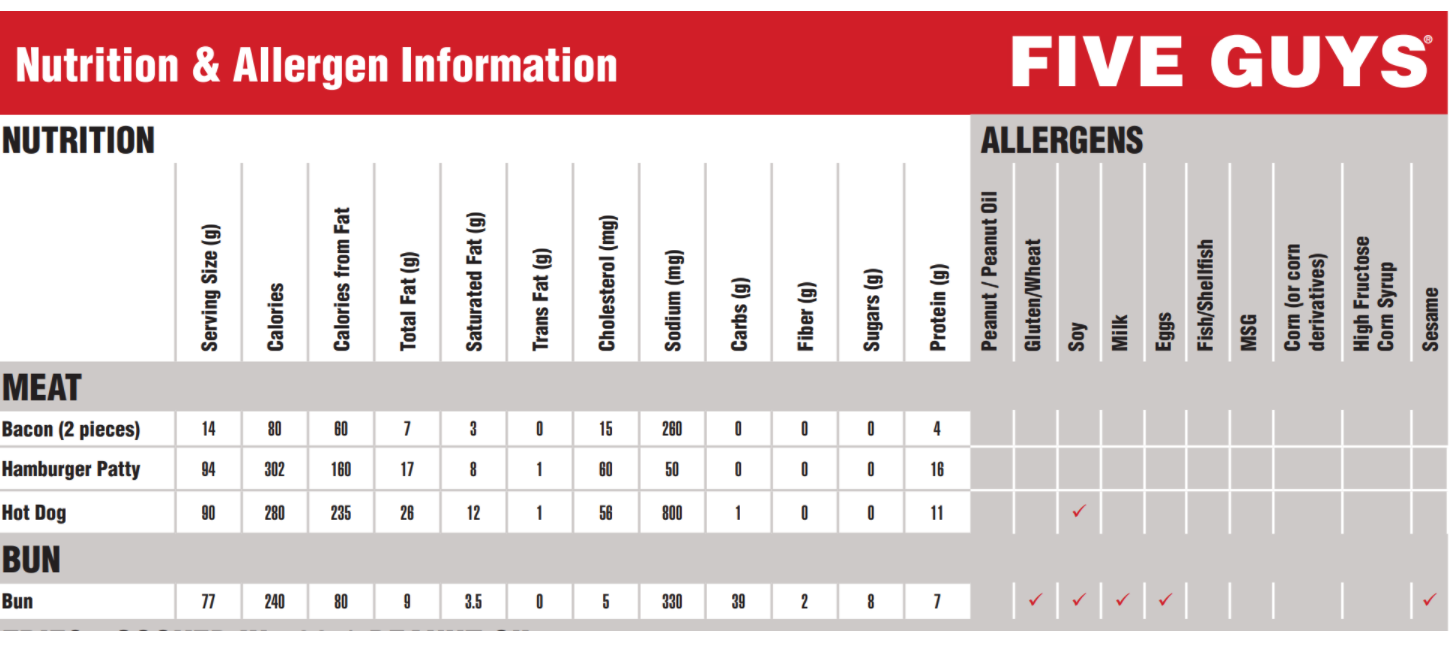


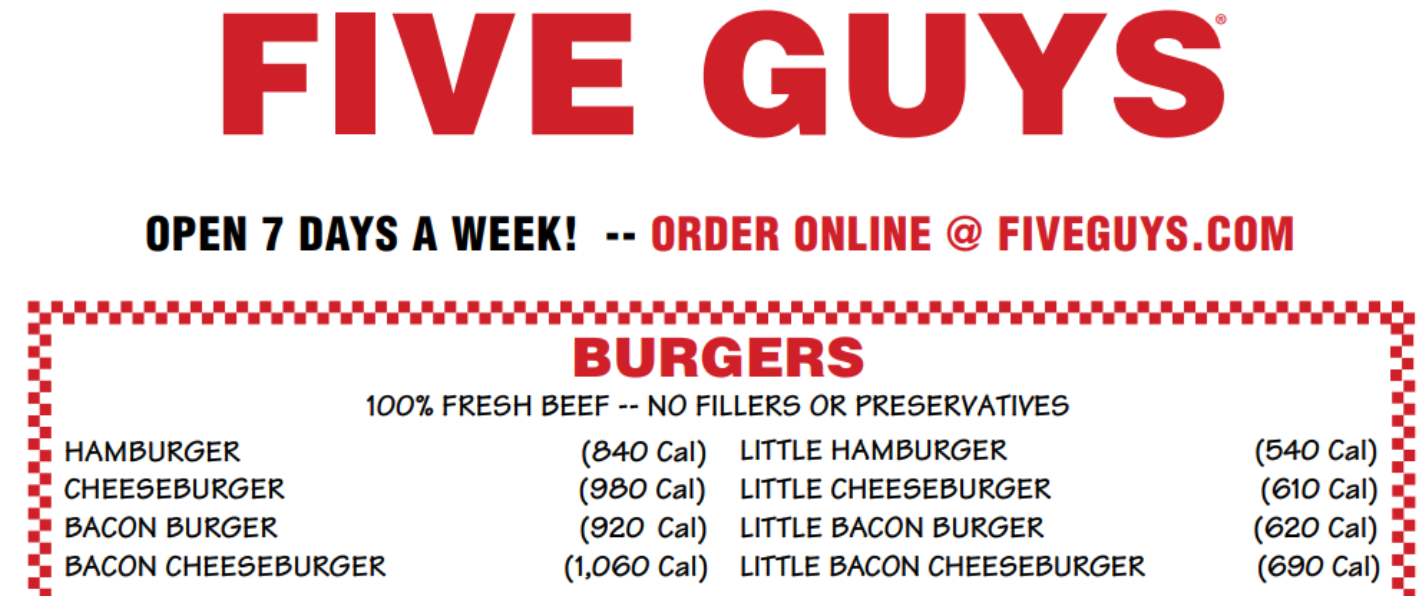

In [527]:
FSqBeefVenues = pd.DataFrame(venuelist)
FSqBeefVenues.rename(columns = {'venue.name': 'Venue', 'venue.location.address': 'Address', 'venue.location.lat': 'Latitude', 'venue.location.lng': 'Longitude'}, inplace=True)
FSqBeefVenues = FSqBeefVenues.drop(['venue.id', 'venue.categories', 'venue.location.distance'], axis = 1)
FSqBeefVenues = FSqBeefVenues.assign(BeefMenuMileageTotal = BeefMenuMileagelist)
FSqBeefVenues

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
0,Fat Cat,24 Chestnut St,42.249794,-71.001587,73.575000
3,Idle Hour,1464 Hancock St,42.248749,-71.001858,29.430000
2,16C,16 Cottage Ave,42.249146,-71.001857,41.692500
5,Five Guys,1250 Hancock Street,42.251781,-71.003171,42.290732


In [528]:
FSqNonBeefVenues = pd.DataFrame(FSqNonBeefVenueList)
FSqNonBeefVenues.rename(columns = {'venue.name': 'Venue', 'venue.location.address': 'Address', 'venue.location.lat': 'Latitude', 'venue.location.lng': 'Longitude'}, inplace=True)
FSqNonBeefVenues = FSqNonBeefVenues.drop(['venue.id', 'venue.categories', 'venue.location.distance'], axis = 1)
FSqNonBeefVenues = FSqNonBeefVenues.assign(BeefMenuMileageTotal = 0)
FSqNonBeefVenues

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
32,Dunkin',1462 Hancock St,42.249146,-71.001857,0
55,Alba's Roof Deck,1486 Hancock St,42.248531,-71.001513,0


In [532]:
#55 should not be Alba's Roof Deck ,should be Shaking Crab
FSqNonBeefVenues.at[55,'Venue']='Shaking Crab'

FSqNonBeefVenues

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
32,Dunkin',1462 Hancock St,42.249146,-71.001857,0
55,Shaking Crab,1486 Hancock St,42.248531,-71.001513,0


In [533]:
Combinedvenuelist = [McDonaldsQuincy, FSqBeefVenues, NonFSqNonBeefVenues, FSqNonBeefVenues]
Combinedvenues = pd.concat(Combinedvenuelist)
Combinedvenues = Combinedvenues.reset_index(drop=True)

TotalBeefVenues = len(Combinedvenues) - 4
CombinedvenuesBeefMenuMileageTotal = Combinedvenues.loc[:, 'BeefMenuMileageTotal'].sum()
MilesQtoBoston = 9.6

print("Beef Menu Mileage Total = Greenhouse Gas emissions equivalent of all Beef items on a restaurant's menu")
print("Number of Restaurants in Analysis:", len(Combinedvenues))
print("Number of Restaurants with Menus that include Beef Items:", TotalBeefVenues)
print("Beef Menu Mileage Total of Venues in Analysis =", CombinedvenuesBeefMenuMileageTotal)
print("If each of the" , TotalBeefVenues , "restaurants with Beef Menu options sells each beef menu item once, it is the Greenhouse Gas emissions equivalent of 1 car being driven for", CombinedvenuesBeefMenuMileageTotal, "miles or", CombinedvenuesBeefMenuMileageTotal/(2*MilesQtoBoston) , "round trip commutes from Quincy to Boston.")

Combinedvenues

Beef Menu Mileage Total = Greenhouse Gas emissions equivalent of all Beef items on a restaurant's menu
Number of Restaurants in Analysis: 10
Number of Restaurants with Menus that include Beef Items: 6
Beef Menu Mileage Total of Venues in Analysis = 275.27823171025716
If each of the 6 restaurants with Beef Menu options sells each beef menu item once, it is the Greenhouse Gas emissions equivalent of 1 car being driven for 275.27823171025716 miles or 14.337407901575894 round trip commutes from Quincy to Boston.


,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
0,McDonald's,"473 Southern Artery, Quincy, MA",42.254384,-70.996300,44.145000
1,McDonald's,275 Hancock St Quincy MA,42.276698,-71.029544,44.145000
2,Fat Cat,24 Chestnut St,42.249794,-71.001587,73.575000
3,Idle Hour,1464 Hancock St,42.248749,-71.001858,29.430000
4,16C,16 Cottage Ave,42.249146,-71.001857,41.692500
5,Five Guys,1250 Hancock Street,42.251781,-71.003171,42.290732
6,Starbucks,18 Cottage Ave,40.546355,-74.142978,0.000000
7,Starbucks,1245 Hancock St,47.126163,-88.579507,0.000000
8,Dunkin',1462 Hancock St,42.249146,-71.001857,0.000000
9,Shaking Crab,1486 Hancock St,42.248531,-71.001513,0.000000


In [534]:
#use geopy library to obtain Quincy coordinates
address = 'Quincy Center, MA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Quincy geographical coordinates:  LATITUDE {}, LONGITUDE {}'.format(latitude, longitude))

#use folium to create map of Quincy with coordinates
map_Quincy = folium.Map(location=[latitude, longitude], zoom_start=15)

#add markers to map
for lat, lng, venue, beefmileage in zip(Combinedvenues['Latitude'], Combinedvenues['Longitude'], Combinedvenues['Venue'],Combinedvenues['BeefMenuMileageTotal']):
    label = '{}, {}'.format(venue,beefmileage)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=float(beefmileage),
        popup=label,
        color='red',
        fill=True,
        fill_color='crimson').add_to(map_Quincy)
    
map_Quincy

Quincy geographical coordinates:  LATITUDE 42.2519231, LONGITUDE -71.0056552


In [531]:
Combinedvenues

,Venue,Address,Latitude,Longitude,BeefMenuMileageTotal
0,McDonald's,"473 Southern Artery, Quincy, MA",42.254384,-70.996300,44.145000
1,McDonald's,275 Hancock St Quincy MA,42.276698,-71.029544,44.145000
2,Fat Cat,24 Chestnut St,42.249794,-71.001587,73.575000
3,Idle Hour,1464 Hancock St,42.248749,-71.001858,29.430000
4,16C,16 Cottage Ave,42.249146,-71.001857,41.692500
5,Five Guys,1250 Hancock Street,42.251781,-71.003171,42.290732
6,Starbucks,18 Cottage Ave,40.546355,-74.142978,0.000000
7,Starbucks,1245 Hancock St,47.126163,-88.579507,0.000000
8,Dunkin',1462 Hancock St,42.249146,-71.001857,0.000000
9,Alba's Roof Deck,1486 Hancock St,42.248531,-71.001513,0.000000


410 pounds of beef consumed is the Greenhouse Gas equivalent of 1 car on the road for one year (i.e. 11,685 miles driven).

(410 pounds x 16 = 6,560 ounces)

Identify the number of unit each restaurant would need to sell of its largest beef menu item to reach this GHG equivalent.

In [ ]:
#1 Year Miles BeefOz = 410*16 

In [ ]:
'Max Beef Menu Weight'
BeefMaxWgtlist = [McDMax, McDMax, FatCatMax, IdleHourMax, Max16C, FiveGuysMax]
BeefMaxWgtlist

In [535]:
BeefVenues = Combinedvenues[0:6]
columns = ["Venue"]
MaxBeefWeightdf = pd.DataFrame(columns = columns)

MaxBeefWeightdf["Venue"] = BeefVenues["Venue"]
MaxBeefWeightdf["Max Weight of Venue's Beef Menu Options"] = BeefMaxWgtlist
MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"] = 6560/MaxBeefWeightdf["Max Weight of Venue's Beef Menu Options"]
MaxBeefWeightdf["Orders per Day/7 Days"] = MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"]/7
MaxBeefWeightdf["Orders per Day/14 Days"] = MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"]/14
MaxBeefWeightdf["Orders per Day/28 Days"] = MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"]/30
MaxBeefWeightdf["Orders per Day/42 Days"] = MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"]/42
MaxBeefWeightdf["Orders per Day/60 Days"] = MaxBeefWeightdf["# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)"]/60
MaxBeefWeightdf

,Venue,Max Weight of Venue's Beef Menu Options,"# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)",Orders per Day/7 Days,Orders per Day/14 Days,Orders per Day/28 Days,Orders per Day/42 Days,Orders per Day/60 Days
0,McDonald's,8.000000,820.000000,117.142857,58.571429,27.333333,19.523810,13.666667
1,McDonald's,8.000000,820.000000,117.142857,58.571429,27.333333,19.523810,13.666667
2,Fat Cat,16.000000,410.000000,58.571429,29.285714,13.666667,9.761905,6.833333
3,Idle Hour,16.000000,410.000000,58.571429,29.285714,13.666667,9.761905,6.833333
4,16C,10.000000,656.000000,93.714286,46.857143,21.866667,15.619048,10.933333
5,Five Guys,3.315752,1978.434915,282.633559,141.316780,65.947830,47.105593,32.973915


In [536]:
FastFoodlist = [MaxBeefWeightdf[0:2], MaxBeefWeightdf[5:]]
FastFooddf = pd.concat(FastFoodlist)
FastFooddf = FastFooddf.drop(["Orders per Day/28 Days"], axis = 1)
FastFooddf = FastFooddf.drop(["Orders per Day/42 Days"], axis = 1)
FastFooddf = FastFooddf.drop(["Orders per Day/60 Days"], axis = 1)
FastFooddf

,Venue,Max Weight of Venue's Beef Menu Options,"# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)",Orders per Day/7 Days,Orders per Day/14 Days
0,McDonald's,8.000000,820.000000,117.142857,58.571429
1,McDonald's,8.000000,820.000000,117.142857,58.571429
5,Five Guys,3.315752,1978.434915,282.633559,141.316780


In [537]:
TableSvcdf = MaxBeefWeightdf[2:5]
TableSvcdf = TableSvcdf.drop(["Orders per Day/7 Days"], axis = 1)
TableSvcdf = TableSvcdf.drop(["Orders per Day/14 Days"], axis = 1)
TableSvcdf

,Venue,Max Weight of Venue's Beef Menu Options,"# of Orders to reach equivalent of 1 Yr's driving (6,560 oz Beef)",Orders per Day/28 Days,Orders per Day/42 Days,Orders per Day/60 Days
2,Fat Cat,16.0,410.0,13.666667,9.761905,6.833333
3,Idle Hour,16.0,410.0,13.666667,9.761905,6.833333
4,16C,10.0,656.0,21.866667,15.619048,10.933333


In [ ]:
#CarDrivenFor1Year = [1*(8/1), 1*(8/1), 1*(8/2), 1*(8/4),  1*(8/4), 1*(8/8)]

In [538]:
#Calculate Cars Driven for 1 Year after 2 months of Sales of Largest Beef Item
Venue = ["McDonald"+"'"+"s(1st)", "McDonald"+"'"+"s(2nd)", "Five Guys", "Fat Cat", "Idle Hour", "16C"] 
CarDrivenFor1Year = [8, 8, 4, 2, 2, 1]
TwoMocarEst = zip(Venue, CarDrivenFor1Year)
TwoMoCarBar = pd.DataFrame(TwoMocarEst)
TwoMoCarBar.rename(columns = {0:"Venue", 1:"Cars on Road (GHG Equivalent) after 2 Months of Largest Beef Ticket Item"}, inplace=True)
TwoMoCarBar

,Venue,Cars on Road (GHG Equivalent) after 2 Months of Largest Beef Ticket Item
0,McDonald's(1st),8
1,McDonald's(2nd),8
2,Five Guys,4
3,Fat Cat,2
4,Idle Hour,2
5,16C,1


In [539]:
import plotly.express as px
fig = px.bar(TwoMoCarBar, x="Cars on Road (GHG Equivalent) after 2 Months of Largest Beef Ticket Item", y="Venue", orientation='h')
fig.show()